# Final Project: Machine Learning for Cancelled Classification Targets in Uber data.



## Abstract

In this project, we will perform an exploratory analysis of data on Uber transactions in 2024. The goal is to understand the main reasons influencing the cancellation of potential interactions referred to by the user, and to identify the potential for customer satisfaction and driver ratings, and whether these cancellations are directly correlated. The dataset contains information on vehicle types, some pickup locations, reasons for cancellation by customers and drivers, recorded reasons, incomplete trips, and payment methods used by those users. We will use visualization and statistical analysis techniques to analyze this data framework and answer key questions and possible hypotheses. This overview would allow us to classify each reservation ID (record) using a machine learning model, such as a binary classifier (logistic regression or random forest).

## Questions & Hypothesis

1. Is there a correlation between cancellation reasons and customer and driver ratings, and the payment method with the value of the reservation in the Uber app?
2. Which behaviors or records have the greatest impact on booking cancellations and customer satisfaction?
3. Is there any variation that influences booking cancellations?
4. Could an ML classification algorithm be applied that would allow us to predict whether or not a trip reservation will be canceled?

#1.Upload Libraries & Dataframe

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#upload dataset from csv file
file_path = '/content/drive/MyDrive/Coderhouse_Entregas/Data Science_2/Datasets/' # Replace with your actual path
df = pd.read_csv("/content/drive/MyDrive/Coderhouse_Entregas/Data Science_2/Datasets/uber_ncr_ride_bookings.csv")
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,3/23/2024,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11/29/2024,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,8/23/2024,8:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,10/21/2024,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,9/16/2024,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


#2. Checking Data

In [ ]:
print(df.shape)

(150000, 21)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

The main fields that we will apply or implement in this analysis and model are:

*   **Date:** Calendar date when the interaction started.
*   **Time:** Time when the interaction started.
*   **Booking ID:** unique number recorded in Uber App
*   **Booking Status:** Final resolution got by the user. This value shows if the booking was completed, cancelled, if the driver was not found, cancelled by the user and if the service was incomplete.
*   **Vehicle Type:** Vehicle make and model (brand)
*   **Cancelled Rides by Customer:** boolean field. Yes or Not represented by 1 or 0.
*   **Reason for cancelling by Customer:** The User selects an option in the Uber app when the Customer cancelled the service.
*   **Cancelled Rides by Driver:** boolean field. Yes or Not represented by 1 or 0.
*   **Driver Cancellation Reason:** The Driver selects an option in the Uber app when the Driver cancelled the service.
*   **Driver Ratings:** Ranking Score between 1 - 5. Service Qualification.
*   **Customer Ratings:** Ranking Score between 1 - 5. Service Qualification.
*   **Payment Method:** Payment method used by the customer: Cash, Credit Card, Debit Card, UPI, Uber Wallet.
****UPI: Unified Payments Interface (UPI) is India's real-time, instant payment system that enables users to transfer money between bank accounts directly from a mobile device using a single application.

In [ ]:
null  = df.isna().sum()
null

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


This data are segmented in specific data view for analysis purpose. It assummed that there was a certain data privacy con this sample due to round data in all null result.

In [ ]:
numeric_data = df.select_dtypes(include=['number']).columns
numeric_data

Index(['Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer',
       'Cancelled Rides by Driver', 'Incomplete Rides', 'Booking Value',
       'Ride Distance', 'Driver Ratings', 'Customer Rating'],
      dtype='object')

In [ ]:
categorical_data = df.select_dtypes(include=['object']).columns
categorical_data

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location',
       'Reason for cancelling by Customer', 'Driver Cancellation Reason',
       'Incomplete Rides Reason', 'Payment Method'],
      dtype='object')

In [ ]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Avg VTAT,139500.0,8.46,3.77,2.0,5.30,8.30,11.30,20.0
Avg CTAT,102000.0,29.15,8.90,10.0,21.60,28.80,36.80,45.0
Cancelled Rides by Customer,10500.0,1.00,0.00,1.0,1.00,1.00,1.00,1.0
Cancelled Rides by Driver,27000.0,1.00,0.00,1.0,1.00,1.00,1.00,1.0
Incomplete Rides,9000.0,1.00,0.00,1.0,1.00,1.00,1.00,1.0
Booking Value,102000.0,508.30,395.81,50.0,234.00,414.00,689.00,4277.0
Ride Distance,102000.0,24.64,14.00,1.0,12.46,23.72,36.82,50.0
Driver Ratings,93000.0,4.23,0.44,3.0,4.10,4.30,4.60,5.0
Customer Rating,93000.0,4.40,0.44,3.0,4.20,4.50,4.80,5.0


In [ ]:
describe = df.describe(include=['O'])
missing_rates = df[describe.columns].isna().mean()
missing_rates.name = 'missing_rate'
describe = pd.concat([describe, missing_rates.to_frame().T])
describe

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Reason for cancelling by Customer,Driver Cancellation Reason,Incomplete Rides Reason,Payment Method
count,150000,150000,150000,150000,150000,150000,150000,150000,10500,27000,9000,102000
unique,365,62910,148767,5,148788,7,176,176,5,4,3,5
top,11/16/2024,17:44:57,"""CNR6337479""",Completed,"""CID6715450""",Auto,Khandsa,Ashram,Wrong Address,Customer related issue,Customer Demand,UPI
freq,462,16,3,93000,3,37419,949,936,2362,6837,3040,45909
missing_rate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.93,0.82,0.94,0.32


In [ ]:
df.dropna(subset=['Date'], inplace=True) #Delete wrong format date in dataframe

In [ ]:
booking_status_counts = df['Booking Status'].value_counts()
booking_status_percentages = df['Booking Status'].value_counts(normalize=True) * 100

# Combine both into a single DataFrame
booking_status_summary = pd.DataFrame({
    'Count': booking_status_counts,
    'Percentage': booking_status_percentages.round(2)  # Round to 2 decimal places
})

booking_status_summary

,Count,Percentage
Booking Status,,
Completed,93000,62.0
Cancelled by Driver,27000,18.0
No Driver Found,10500,7.0
Cancelled by Customer,10500,7.0
Incomplete,9000,6.0


Cancellations by customers and drivers account for around 25% of Uber's bookings. This means that there is potential revenue that can be recovered in the future if these cancellations are avoided.

In [ ]:
payment_method_counts = df['Payment Method'].value_counts()
payment_method_percentages = df['Payment Method'].value_counts(normalize=True) * 100

# Combine both into a single DataFrame
payment_method_summary = pd.DataFrame({
    'Count': payment_method_counts,
    'Percentage': payment_method_percentages.round(2)  # Round to 2 decimal places
})

payment_method_summary

,Count,Percentage
Payment Method,,
UPI,45909,45.01
Cash,25367,24.87
Uber Wallet,12276,12.04
Credit Card,10209,10.01
Debit Card,8239,8.08


The UPI payment method is very common in India (45% participation in 2024). That means that if all controls and strategies were applied to this type of payment, it would be beneficial for Uber. Guaranteeing this method to avoid cancellations could be a good measure to increase bookings on Uber.

In [ ]:
vehicle_type_counts = df['Vehicle Type'].value_counts()
vehicle_type_percentages = df['Vehicle Type'].value_counts(normalize=True) * 100

# Combine both into a single DataFrame
vehicle_type_summary = pd.DataFrame({
    'Count': vehicle_type_counts,
    'Percentage': vehicle_type_percentages.round(2)  # Round to 2 decimal places
})

vehicle_type_summary

,Count,Percentage
Vehicle Type,,
Auto,37419,24.95
Go Mini,29806,19.87
Go Sedan,27141,18.09
Bike,22517,15.01
Premier Sedan,18111,12.07
eBike,10557,7.04
Uber XL,4449,2.97


In [ ]:
cancelled__rides_customer_counts = df['Cancelled Rides by Customer'].value_counts()
cancelled_rides_customer_percentages = df['Cancelled Rides by Customer'].value_counts(normalize=True) * 100

# Combine both into a single DataFrame
cancelled_rides_customer_summary = pd.DataFrame({
    'Count': cancelled__rides_customer_counts,
    'Percentage': cancelled_rides_customer_percentages.round(2)  # Round to 2 decimal places
})

cancelled_rides_customer_summary

,Count,Percentage
Cancelled Rides by Customer,,
1.0,10500,100.0


In [ ]:
cancelled__rides_driver_counts = df['Cancelled Rides by Driver'].value_counts()
cancelled_rides_driver_percentages = df['Cancelled Rides by Driver'].value_counts(normalize=True) * 100

# Combine both into a single DataFrame
cancelled_rides_driver_summary = pd.DataFrame({
    'Count': cancelled__rides_driver_counts,
    'Percentage': cancelled_rides_driver_percentages.round(2)  # Round to 2 decimal places
})

cancelled_rides_driver_summary

,Count,Percentage
Cancelled Rides by Driver,,
1.0,27000,100.0


#3. Data Cleaning

##3.1 Manage Formats

In [ ]:
# Convert categorical columns to 'category' data type
category_cols = [
    'Booking Status', 'Vehicle Type',
    'Reason for cancelling by Customer', 'Driver Cancellation Reason',
    'Incomplete Rides', 'Payment Method'
]

for cols in category_cols:
    df[cols] = df[cols].astype('category')

In [ ]:
# Convert Booking ID and Customer ID columns to 'string' data type
df['Booking ID'] = df['Booking ID'].astype('string')
df['Customer ID'] = df['Customer ID'].astype('string')

In [ ]:
# Convert boolean-like columns to actual boolean data type
boolean_columns = [
    'Cancelled Rides by Customer',
    'Cancelled Rides by Driver',
    'Incomplete Rides'
]

for cols in boolean_columns:
    df[cols] = df[cols].notna()

In [ ]:
#Convert 'Time' field to float64 / int
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Hour'] = df['Time'].dt.hour

/tmp/ipython-input-210483941.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce')


In [ ]:
#Confirm dtypes formats in every column
numeric_data = df.select_dtypes(include=['number']).columns
numeric_data

Index(['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Hour'],
      dtype='object')

##3.2 Handle Missing Values

In [ ]:
df.duplicated(subset=['Booking ID']).sum()

np.int64(1233)

In [ ]:
# Remove duplicate rows based on 'Booking ID'
df = df.drop_duplicates(subset=['Booking ID'])
df.duplicated(subset=['Booking ID']).sum()

np.int64(0)

##3.3 Handle Null Data

In [ ]:
#Manage Null data
# Loop through the specified columns

target_columns = ['Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides', 'Booking Value', 'Ride Distance']  # Columns you want to check/modify

for col in target_columns:
    if col in df.columns and df[col].dtype == 'float64':
        if df[col].isna().any():
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)

# Result
print(df)
print("\nData types:")
print(df.dtypes)

              Date                Time    Booking ID   Booking Status  \
0        3/23/2024 2025-10-06 12:29:38  "CNR5884300"  No Driver Found   
1       11/29/2024 2025-10-06 18:01:39  "CNR1326809"       Incomplete   
2        8/23/2024 2025-10-06 08:56:10  "CNR8494506"        Completed   
3       10/21/2024 2025-10-06 17:17:25  "CNR8906825"        Completed   
4        9/16/2024 2025-10-06 22:08:00  "CNR1950162"        Completed   
...            ...                 ...           ...              ...   
149995  11/11/2024 2025-10-06 19:34:01  "CNR6500631"        Completed   
149996  11/24/2024 2025-10-06 15:55:09  "CNR2468611"        Completed   
149997   9/18/2024 2025-10-06 10:55:15  "CNR6358306"        Completed   
149998   10/5/2024 2025-10-06 07:53:34  "CNR3030099"        Completed   
149999   3/10/2024 2025-10-06 15:38:03  "CNR3447390"        Completed   

         Customer ID   Vehicle Type         Pickup Location  \
0       "CID1982111"          eBike             Palam Vihar 

#4. Exploratory Data Analysis (EDA)

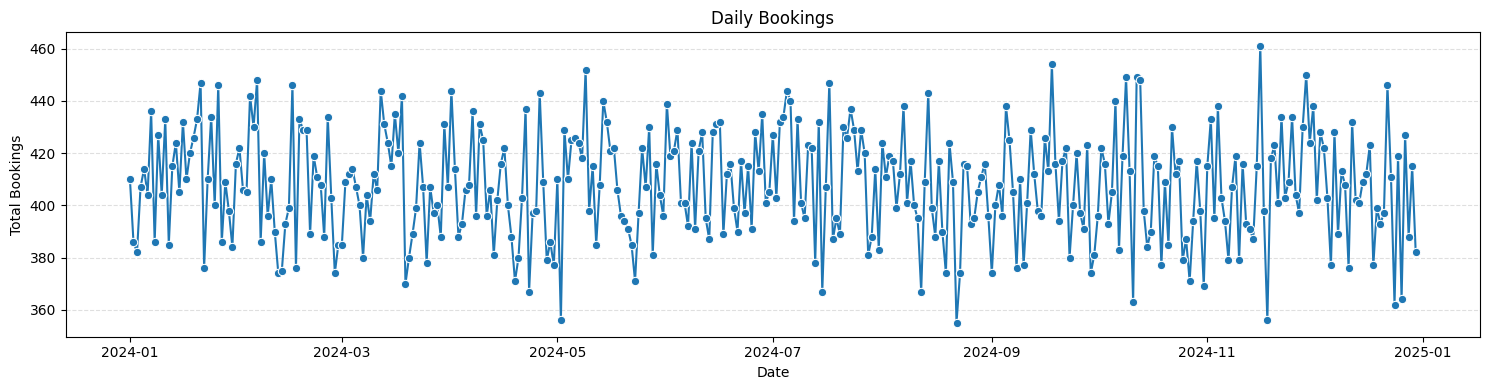

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') # Change 'DataHora' in date formart


ts = df.groupby('Date', as_index=False)['Booking ID'].count().reset_index() # gruop data by the new date field, and count the variable 'Booking ID'

#Create the line chart in Seaborn
plt.figure(figsize=(15, 4))
sns.lineplot(data=ts, x='Date', y='Booking ID', marker='o')
plt.title('Daily Bookings')
plt.xlabel('Date'); plt.ylabel('Total Bookings')
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
# Rides per day
df = df.reset_index()
rides_per_day = df.resample('D', on='Date').size().rename('rides')
rides_per_day.head()

,rides
Date,
2024-01-01,410
2024-01-02,386
2024-01-03,382
2024-01-04,407
2024-01-05,414


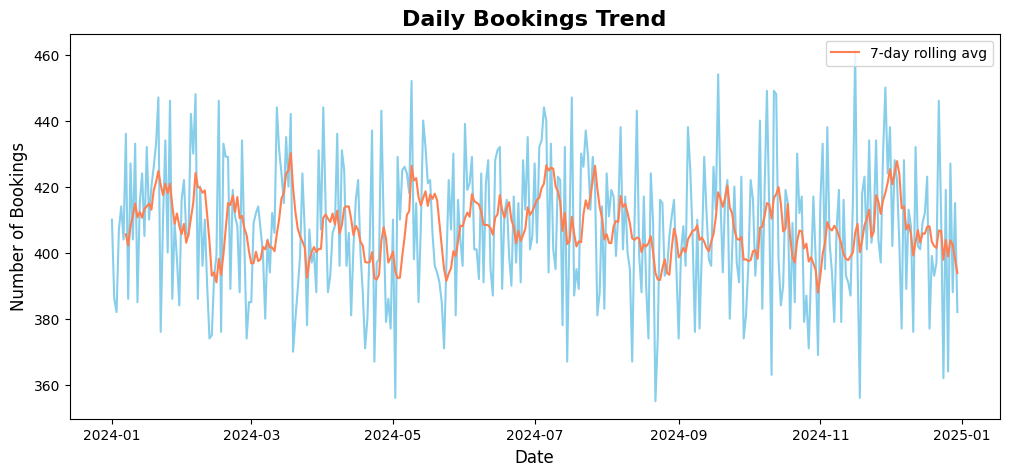

In [ ]:
rides_per_day = rides_per_day.reset_index()

fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=rides_per_day, x='Date', y='rides', ax=ax, color='skyblue')
sns.lineplot(data=rides_per_day, x='Date', y=rides_per_day['rides'].rolling(7).mean(),
             label='7-day rolling avg', color='coral', ax=ax)
plt.title('Daily Bookings Trend', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.legend(loc='upper right')
plt.show()

## 7-day rolling Average

**A rolling average (or Moving Average) is a statistical method to smooth out short-term fluctuations and highlight longer-term trends or cycle. In this visualation, the 7-day rolling average takes the average fo the current day ans the previous 6 days. So, for each day, it computes the mean of the last 7 days' data, which reduce noise and makes trends easier to see. In this plot, we can see fluctuations between 16 & 18 days in Bookings (a kind of seasonality in this data).

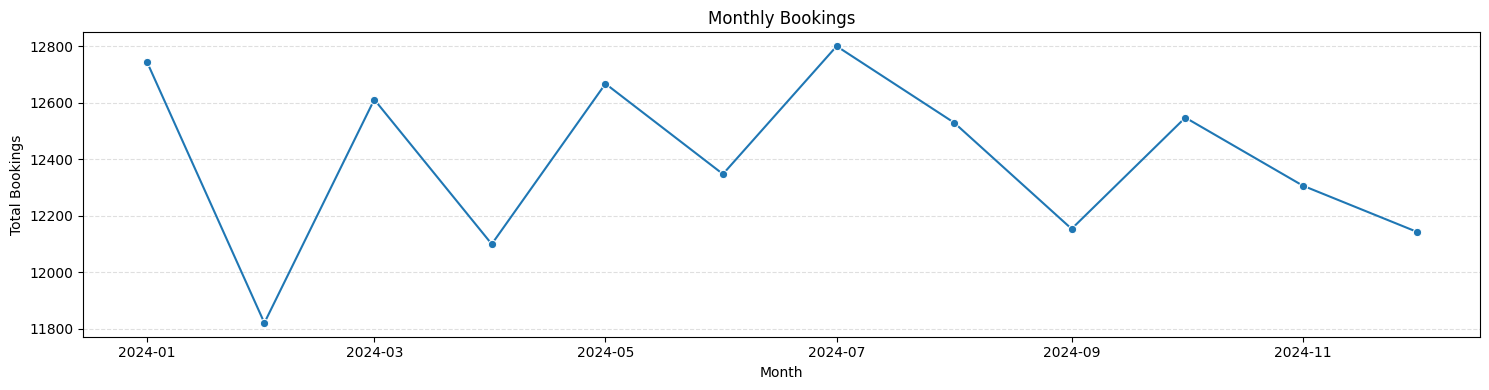

In [ ]:
#df['Date'] = pd.to_datetime(df['Date'], errors='coerce') # Change 'DataHora' in date formart
df['Month'] = df['Date'].dt.month # Extract month
df['Year'] = df['Date'].dt.year # Extract year
df['MonthName'] = df['Date'].dt.strftime('%b')  # For display

# Optional: Sort by year and month
df = df.sort_values(['Year', 'Month'])

# Aggregate: count bookings per month
monthly_counts = df.groupby(['Year', 'Month', 'MonthName']).size().reset_index(name='TotalBookings')

# Create a 'Year-Month' label for x-axis (e.g., '2025-Sep')
monthly_counts['YearMonth'] = pd.to_datetime(dict(year=monthly_counts.Year, month=monthly_counts.Month, day=1))

#Create the line chart in Seaborn
plt.figure(figsize=(15, 4))
sns.lineplot(data=monthly_counts, x='YearMonth', y='TotalBookings', marker='o')
plt.title('Monthly Bookings')
plt.xlabel('Month'); plt.ylabel('Total Bookings')
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

The monthly bookings were fluctuating in all 2024, and there is not a clear trend in this data month over month.Bookings has been increase of 12k bookings in July, and reached a low point of 11.8k in February.

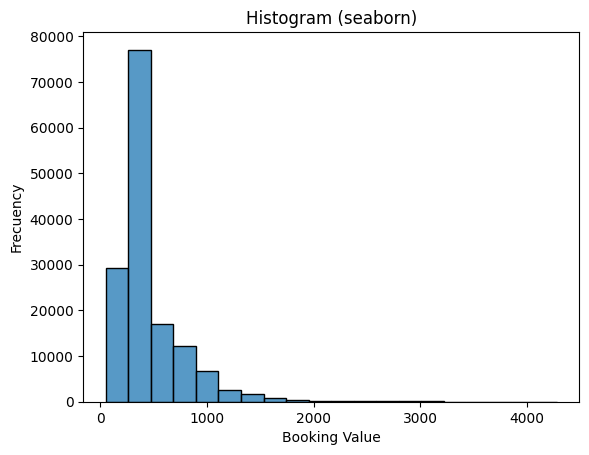

In [ ]:
# Create Histogram
sns.histplot(df['Booking Value'], bins=20, kde=False)  # kde=True ->curva
plt.xlabel("Booking Value")
plt.ylabel("Frecuency")
plt.title("Histogram (seaborn)")
plt.show()

The most common Booking value are between 250-500 (local currency) and can explain the payment method and the ride distance.

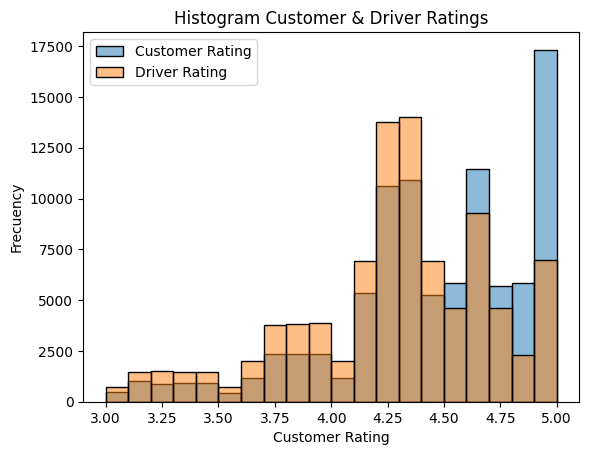

In [ ]:
#SEABORN

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create Histogram
sns.histplot(df['Customer Rating'], label = 'Customer Rating', bins=20, kde=False, alpha = 0.5)  # kde=True ->curva
sns.histplot(df['Driver Ratings'], label = 'Driver Rating', bins=20, kde=False, alpha = 0.5)  # kde=True ->curva
plt.xlabel("Customer Rating")
plt.ylabel("Frecuency")
plt.title("Histogram Customer & Driver Ratings")
plt.legend()
plt.show()



The customer experience is better than the driver rating. This histogram allows us to see the distribution data in both scenarios, where the maximum rating is more common among customers (flexible opinions or few complaints about the service), but, on the other hand, some customers did not receive a good rating from drivers.

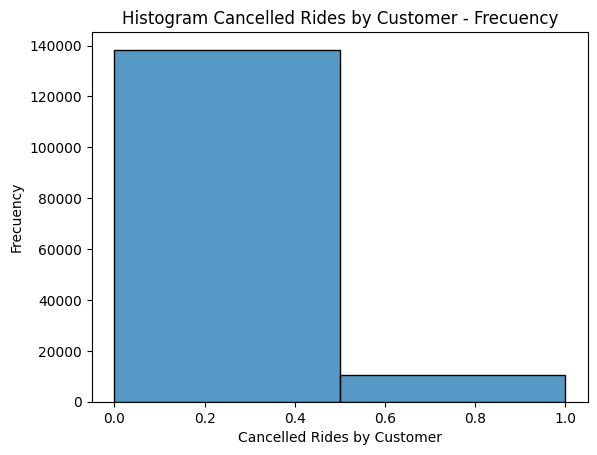

In [ ]:
# Create Histogram by 'Cancelled by Customer' Frecuency
sns.histplot(df['Cancelled Rides by Customer'], bins=2, kde=False)  # kde=True ->curva
plt.xlabel("Cancelled Rides by Customer")
plt.ylabel("Frecuency")
plt.title("Histogram Cancelled Rides by Customer - Frecuency")
plt.show()

7% of total of Bookings were cancelled by the customer!

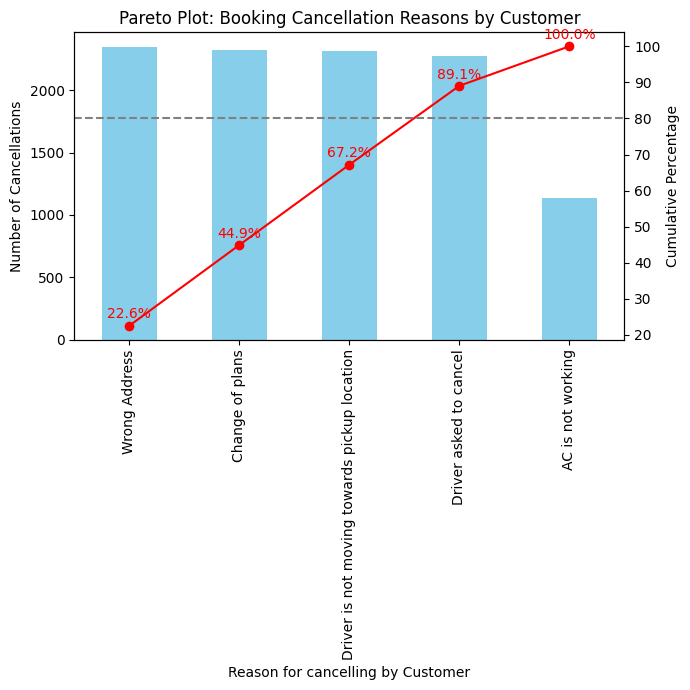

In [ ]:
# Count each reason
counts = df['Reason for cancelling by Customer'].value_counts()
cum_percentage = counts.cumsum() / counts.sum() * 100

# Plot bar chart (counts)
fig, ax1 = plt.subplots(figsize=(7, 7))
counts.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_ylabel('Number of Cancellations')
ax1.set_title('Pareto Plot: Booking Cancellation Reasons by Customer')

# Plot cumulative percentage on secondary y-axis
ax2 = ax1.twinx()
cum_percentage.plot(color='red', marker='o', ax=ax2)
ax2.set_ylabel('Cumulative Percentage')
ax2.axhline(80, color='gray', linestyle='--')  # 80% reference line

# Annotate cumulative % on the curve
for i, val in enumerate(cum_percentage):
    ax2.text(i, val + 2, f'{val:.1f}%', ha='center', color='red')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The four main reasons why customers cancel are quite similar. Two of them are directly related to the driver.

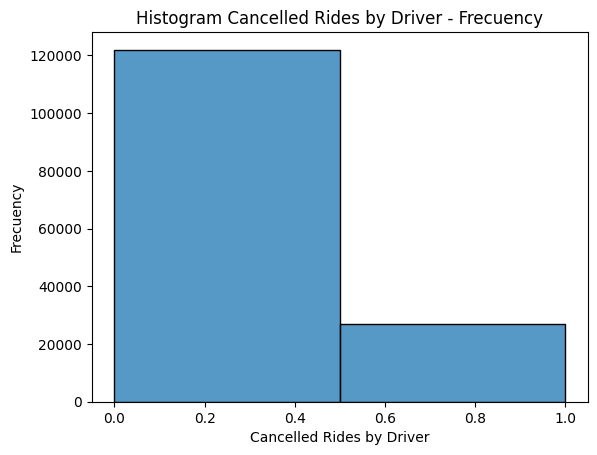

In [ ]:
# Create Histogram by 'Cancelled by Driver' Frecuency
sns.histplot(df['Cancelled Rides by Driver'], bins=2, kde=False)  # kde=True ->curva
plt.xlabel("Cancelled Rides by Driver")
plt.ylabel("Frecuency")
plt.title("Histogram Cancelled Rides by Driver - Frecuency")
plt.show()

18% of bookings were cancelled by the Driver!

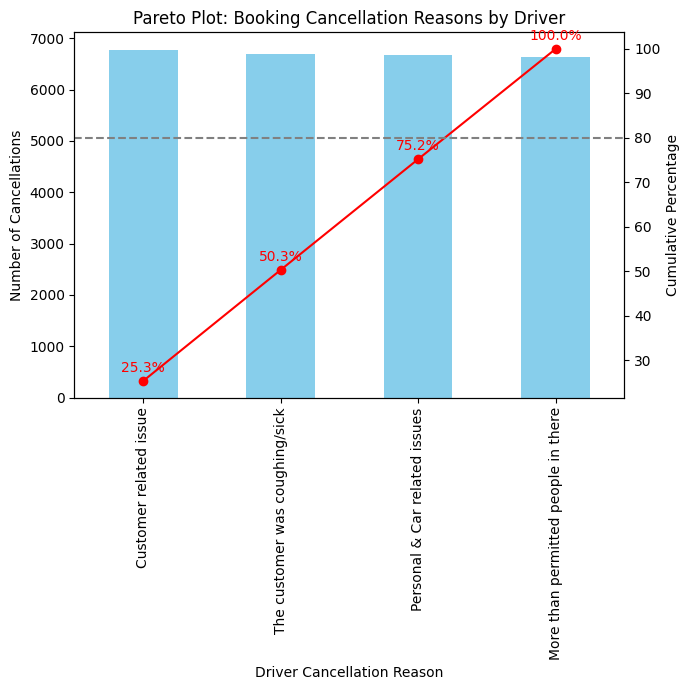

In [ ]:
# Count each reason
counts = df['Driver Cancellation Reason'].value_counts()
cum_percentage = counts.cumsum() / counts.sum() * 100

# Plot bar chart (counts)
fig, ax1 = plt.subplots(figsize=(7, 7))
counts.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_ylabel('Number of Cancellations')
ax1.set_title('Pareto Plot: Booking Cancellation Reasons by Driver')

# Plot cumulative percentage on secondary y-axis
ax2 = ax1.twinx()
cum_percentage.plot(color='red', marker='o', ax=ax2)
ax2.set_ylabel('Cumulative Percentage')
ax2.axhline(80, color='gray', linestyle='--')  # 80% reference line

# Annotate cumulative % on the curve
for i, val in enumerate(cum_percentage):
    ax2.text(i, val + 2, f'{val:.1f}%', ha='center', color='red')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The distribution of Driver Cancellation Reasons are quite the same. No much difference on each other. The top 3 of this reasons are not over 80% cumulative percentage.

In [ ]:
# 2) IQR rule over Customer Rating
q1 = df["Customer Rating"].quantile(0.25)
print("Q1", q1)
q3 = df["Customer Rating"].quantile(0.75)
print("Q3",q3)
iqr = q3 - q1
print("IQR: ",iqr)
lim_inf = q1 - 1.5*iqr
print("Lower Limit: ",lim_inf)
lim_sup = q3 + 1.5*iqr
print("Upper Limit: ",lim_sup)

Q1 4.2
Q3 4.8
IQR:  0.5999999999999996
Lower Limit:  3.3000000000000007
Upper Limit:  5.699999999999999


In [ ]:
#Identification of Outliers
mask_out = (df["Customer Rating"] < lim_inf) | (df["Customer Rating"] > lim_sup)
n_out = mask_out.sum()
print(f"Outliers identified in Customer Rating: {n_out}")
print(df.loc[mask_out, ["Customer Rating","Payment Method","Date","Time"]].head())

Outliers identified in Customer Rating: 3237
      Customer Rating Payment Method       Date                Time
2646              3.3    Uber Wallet 2024-01-08 2025-10-06 03:02:41
3434              3.1           Cash 2024-01-23 2025-10-06 07:14:32
4335              3.1            UPI 2024-01-25 2025-10-06 16:05:49
6194              3.2            UPI 2024-01-02 2025-10-06 20:31:16
6274              3.2    Uber Wallet 2024-01-11 2025-10-06 01:36:33


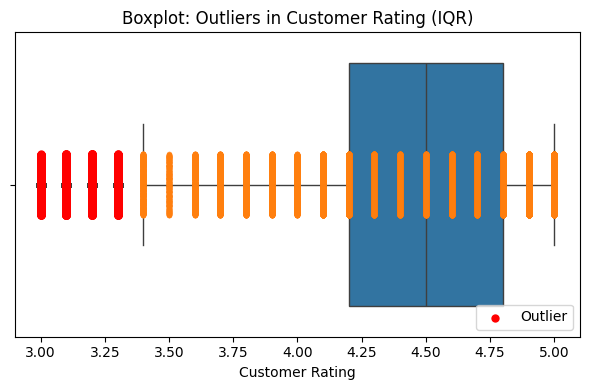

In [ ]:
# -------------------------------
# GRAFICO 1: Boxplot global + puntos
# -------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Customer Rating"], orient="h")
sns.stripplot(x=df["Customer Rating"], orient="h", alpha=0.5, size=4)

# resaltar outliers en rojo
sns.stripplot(x=df.loc[mask_out, "Customer Rating"], orient="h", color="red", size=6, label="Outlier")

plt.title("Boxplot: Outliers in Customer Rating (IQR)")
plt.xlabel("Customer Rating")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

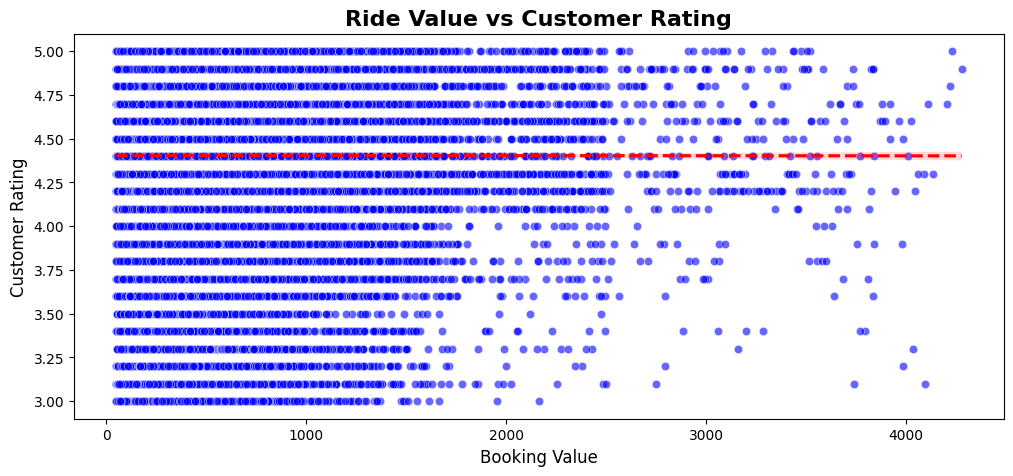

In [ ]:
# -------------------------------
# GRAFICO 2: Scatter plot Booking Value by Customer Rating
# -------------------------------
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df, x='Booking Value', y='Customer Rating', alpha=0.6, color='blue')
sns.regplot(data=df, x='Booking Value', y='Customer Rating', scatter=False, color="red", line_kws={'linestyle':'--'})
plt.title("Ride Value vs Customer Rating", fontsize=16, fontweight='bold')
plt.xlabel("Booking Value", fontsize=12)
plt.ylabel("Customer Rating", fontsize=12)
plt.show()

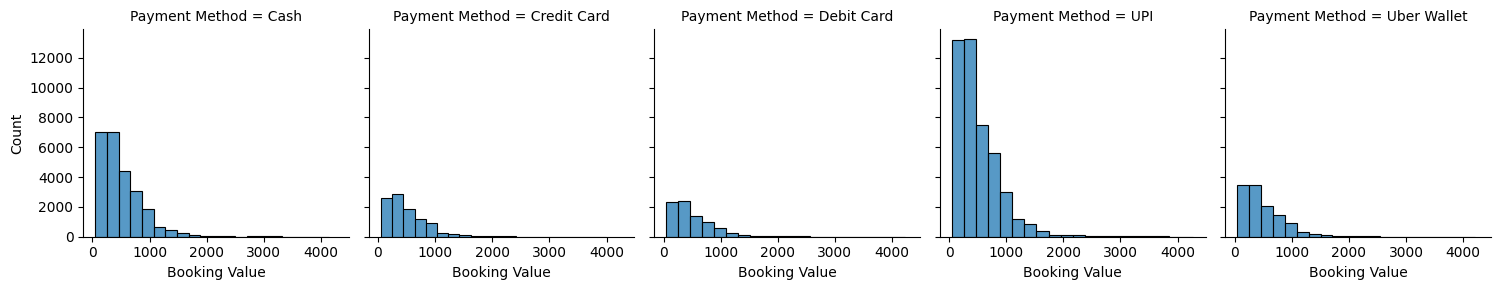

In [ ]:
# Create a grid plot by Payment Method (count Booking Value)
g = sns.FacetGrid(df, col="Payment Method", sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="Booking Value", kde=False, bins=20, multiple="stack")
g.add_legend()
plt.tight_layout()
plt.show()

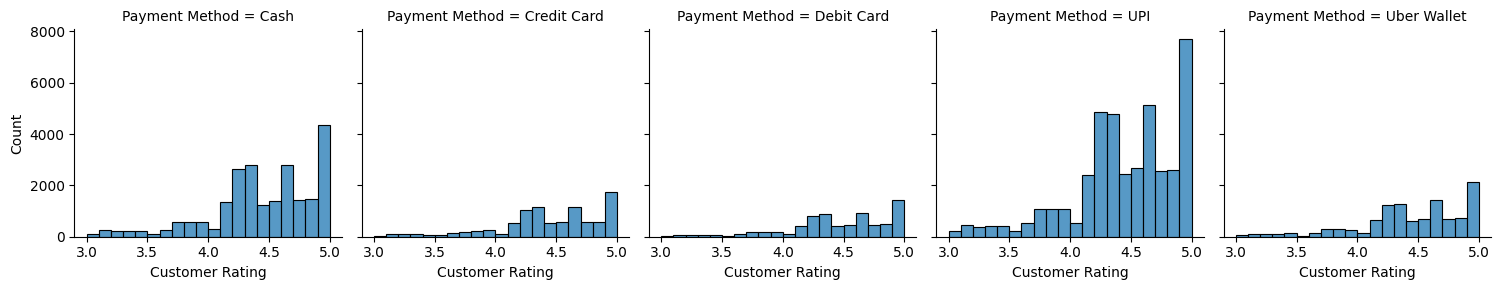

In [ ]:
# Create a grid plot by Payment Method (average Customer)
g_2 = sns.FacetGrid(df, col="Payment Method", sharex=True, sharey=True)
g_2.map_dataframe(sns.histplot, x="Customer Rating", kde=False, bins=20, multiple="stack")
g_2.add_legend()
plt.tight_layout()
plt.show()

In [ ]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
print(correlation_matrix)

                    index  Avg VTAT  Avg CTAT  Booking Value  Ride Distance  \
index            1.000000 -0.001891  0.003196       0.001842      -0.003682   
Avg VTAT        -0.001891  1.000000  0.051163      -0.006272       0.050696   
Avg CTAT         0.003196  0.051163  1.000000       0.003235       0.102238   
Booking Value    0.001842 -0.006272  0.003235       1.000000       0.010042   
Ride Distance   -0.003682  0.050696  0.102238       0.010042       1.000000   
Driver Ratings  -0.003368 -0.005255  0.001129      -0.000175      -0.001857   
Customer Rating  0.002478 -0.004442  0.001349      -0.000553       0.004358   
Hour            -0.000170 -0.004077 -0.000949      -0.000702      -0.002400   
Month           -0.001452  0.003206 -0.000238       0.002294       0.004295   
Year                  NaN       NaN       NaN            NaN            NaN   

                 Driver Ratings  Customer Rating      Hour     Month  Year  
index                 -0.003368         0.002478 -0.0

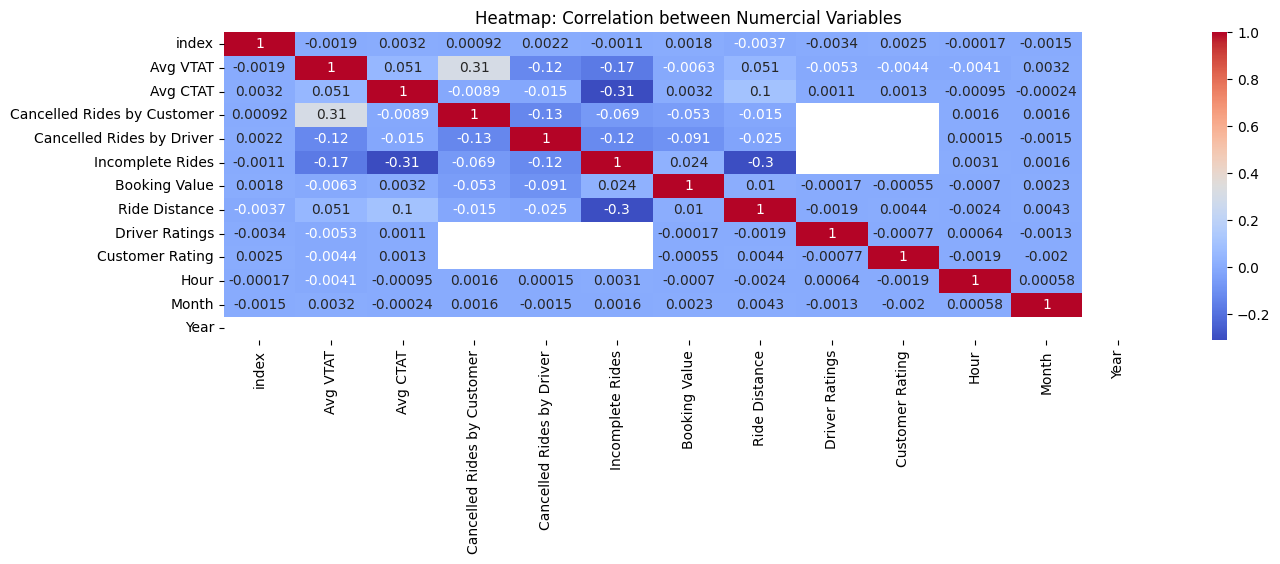

In [ ]:
# Calculate the Correlation Matrix
correlation = df.corr(numeric_only=True)

plt.figure(figsize=(15, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Heatmap: Correlation between Numercial Variables")
plt.show()

No correlation data between numeric fields

###Hour x Week analysis

In [ ]:
###Hour x Week analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148767 entries, 26 to 148748
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   index                              148767 non-null  int64         
 1   Date                               148767 non-null  datetime64[ns]
 2   Time                               148767 non-null  datetime64[ns]
 3   Booking ID                         148767 non-null  string        
 4   Booking Status                     148767 non-null  category      
 5   Customer ID                        148767 non-null  string        
 6   Vehicle Type                       148767 non-null  category      
 7   Pickup Location                    148767 non-null  object        
 8   Drop Location                      148767 non-null  object        
 9   Avg VTAT                           148767 non-null  float64       
 10  Avg CTAT                

In [ ]:
df['Hour'] = df['Time'].dt.hour
hourly_counts = df.groupby('Hour').size().reset_index(name='rides')
hourly_counts.head()

df['Weekday'] = df['Date'].dt.day_name()

pivot = df.groupby(['Weekday', 'Hour']).size().reset_index(name='rides')
pivot_table = pivot.pivot(index='Weekday', columns='Hour', values='rides')

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(weekday_order)

pivot_table

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
Monday,202,209,205,202,181,444,589,761,1020,1199,...,996,1152,1380,1563,1820,1547,1412,1204,722,405
Tuesday,178,185,203,203,185,414,626,785,1020,1132,...,990,1191,1319,1529,1749,1583,1358,1160,790,375
Wednesday,207,185,192,178,183,366,615,765,931,1210,...,955,1159,1384,1598,1776,1551,1403,1098,781,424
Thursday,207,195,182,197,167,396,572,770,932,1135,...,974,1222,1340,1566,1672,1537,1351,1132,781,387
Friday,177,185,189,203,203,373,585,760,978,1154,...,1034,1146,1401,1534,1752,1567,1357,1093,752,360
Saturday,195,197,171,189,199,407,583,769,954,1149,...,1030,1158,1351,1591,1783,1548,1367,1160,788,420
Sunday,199,191,179,202,193,364,559,791,971,1191,...,984,1111,1390,1581,1746,1630,1301,1184,783,368


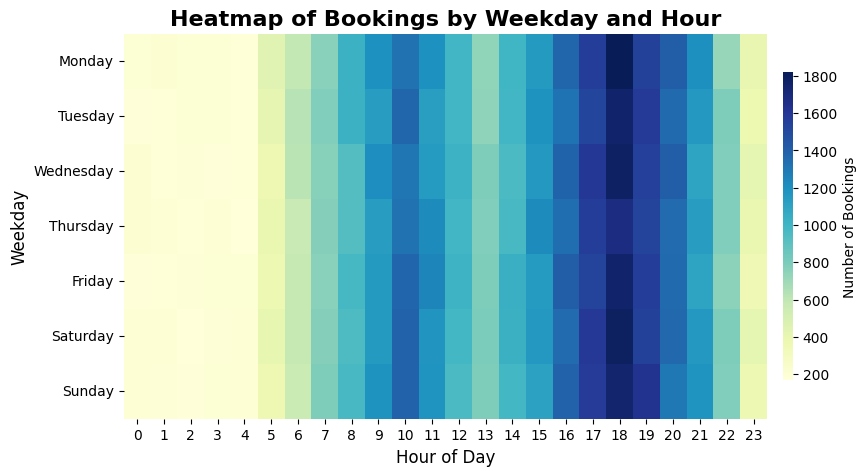

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(pivot_table, cmap='YlGnBu',
            cbar_kws={'label': 'Number of Bookings', 'shrink': 0.8, 'aspect': 30, 'pad': 0.02})
plt.title('Heatmap of Bookings by Weekday and Hour', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Weekday', fontsize=12)
plt.show()

Demand is high between 4:00 p.m. and 7:00 p.m., and reservations are more frequent on Mondays, Wednesdays, and Fridays.